Proyecto final de bootcamp udd 2025


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bootcamp1/Oscars-demographics-DFE.csv', encoding ='ISO-8859-1')

In [ ]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


In [ ]:
df['award'].value_counts()

,count
award,
Best Actress,95
Best Director,91
Best Actor,88
Best Supporting Actress,85
Best Supporting Actor,82


In [ ]:
df = df.drop(['_last_judgment_at', 'birthplace_gold', 'date_of_birth_gold', 'race_ethnicity_gold', 'religion_gold', 'sexual_orientation_gold', 'year_of_award_gold'], axis=1)



In [ ]:
df = df.drop(['birthplace'], axis=1)

In [ ]:


missing_cols = df.columns[df.isnull().any()].tolist()
print("\nColumns with missing values:", missing_cols)


for col in missing_cols:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"Filled missing values in '{col}' with mode.")




Columns with missing values: []


In [ ]:
completitud_total = 100 * df.notnull().sum().sum() / df.size


In [ ]:
completitud_columnas = df.notnull().mean() * 100
print(completitud_columnas)

_unit_id                         100.0
_golden                          100.0
_unit_state                      100.0
_trusted_judgments               100.0
birthplace:confidence            100.0
date_of_birth                    100.0
date_of_birth:confidence         100.0
race_ethnicity                   100.0
race_ethnicity:confidence        100.0
religion                         100.0
religion:confidence              100.0
sexual_orientation               100.0
sexual_orientation:confidence    100.0
year_of_award                    100.0
year_of_award:confidence         100.0
award                            100.0
biourl                           100.0
movie                            100.0
person                           100.0
dtype: float64


In [ ]:
df.  isnull().sum()

,0
_unit_id,0
_golden,0
_unit_state,0
_trusted_judgments,0
birthplace:confidence,0
date_of_birth,0
date_of_birth:confidence,0
race_ethnicity,0
race_ethnicity:confidence,0
religion,0


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r"http\S+|www\S+|https\S+", '', texto)  # quitar URLs
    texto = re.sub(r"@\w+", '', texto)  # quitar menciones
    texto = re.sub(r"#\w+", '', texto)  # quitar hashtags
    texto = re.sub(r"[^a-zA-ZáéíóúñüÁÉÍÓÚÑÜ\s]", '', texto)  # quitar caracteres especiales
    texto = re.sub(r"\s+", ' ', texto).strip()  # quitar espacios extra
    return texto


In [ ]:
df['biourl'] = df['biourl'].apply(limpiar_texto)

In [ ]:
df = df.drop(['date_of_birth', 'date_of_birth:confidence', 'race_ethnicity:confidence'], axis =1)

In [ ]:
df = df.drop(['_trusted_judgments', 'birthplace:confidence'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _unit_id                       441 non-null    int64  
 1   _golden                        441 non-null    bool   
 2   _unit_state                    441 non-null    object 
 3   race_ethnicity                 441 non-null    object 
 4   religion                       441 non-null    object 
 5   religion:confidence            441 non-null    float64
 6   sexual_orientation             441 non-null    object 
 7   sexual_orientation:confidence  441 non-null    float64
 8   year_of_award                  441 non-null    int64  
 9   year_of_award:confidence       441 non-null    float64
 10  award                          441 non-null    object 
 11  biourl                         441 non-null    object 
 12  movie                          441 non-null    obj

In [ ]:
# prompt: pasar las variables object a numerica

# Seleccionar columnas de tipo 'object'
object_cols = df.select_dtypes(include=['object']).columns

# Iterar sobre las columnas de tipo 'object' y convertirlas a numérico si es posible
for col in object_cols:
    try:
        # Intentar convertir a numérico directamente
        df[col] = pd.to_numeric(df[col])
        print(f"Converted column '{col}' to numeric.")
    except ValueError:
        # Si falla, intentar con factorize (para variables categóricas)
        try:
            df[col], _ = pd.factorize(df[col])
            print(f"Converted column '{col}' using factorize.")
        except Exception as e:
            print(f"Could not convert column '{col}' to numeric: {e}")

df.info()

Converted column '_unit_state' using factorize.
Converted column 'race_ethnicity' using factorize.
Converted column 'religion' using factorize.
Converted column 'sexual_orientation' using factorize.
Converted column 'award' using factorize.
Converted column 'biourl' to numeric.
Converted column 'movie' using factorize.
Converted column 'person' using factorize.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _unit_id                       441 non-null    int64  
 1   _golden                        441 non-null    bool   
 2   _unit_state                    441 non-null    int64  
 3   race_ethnicity                 441 non-null    int64  
 4   religion                       441 non-null    int64  
 5   religion:confidence            441 non-null    float64
 6   sexual_orientation             441 non-null   

In [ ]:
df = df.drop('biourl', axis= 1)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.head()

,_unit_id,_golden,_unit_state,race_ethnicity,religion,religion:confidence,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,movie,person
0,670454353,False,0,0,0,1.0,0,1.0000,1927,1.0000,0,0,0
1,670454354,False,0,0,0,1.0,0,0.6842,1930,1.0000,0,1,1
2,670454355,False,0,0,0,1.0,0,1.0000,1931,0.6667,0,2,0
3,670454356,False,0,0,0,1.0,0,1.0000,1932,1.0000,0,3,2
4,670454357,False,0,0,1,1.0,0,1.0000,1933,1.0000,0,4,3


In [ ]:
df = df.drop(['_unit_id', '_golden', '_unit_state'], axis=1)

In [ ]:
df = pd.get_dummies(df, columns=['award', 'religion', 'movie', 'person','race_ethnicity', 'sexual_orientation'], drop_first=True)

In [ ]:
df.head()

,religion:confidence,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award_1,award_2,award_3,award_4,religion_1,religion_2,...,race_ethnicity_1,race_ethnicity_2,race_ethnicity_3,race_ethnicity_4,race_ethnicity_5,sexual_orientation_1,sexual_orientation_2,sexual_orientation_3,sexual_orientation_4,sexual_orientation_5
0,1.0,1.0000,1927,1.0000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.0,0.6842,1930,1.0000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.0,1.0000,1931,0.6667,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,1.0000,1932,1.0000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.0,1.0000,1933,1.0000,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


implementacion de modelo a eleccion




In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import HeNormal
import pandas as pd

In [ ]:
X = df.drop(['award'], axis=1)
y = df['award']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
import pandas as pd


In [ ]:
# Selección de columnas numéricas
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns





In [ ]:
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols]) # X_train['religion:confidence', 'sexual_orientation:confidence', 'year_of_award:confidence']

In [ ]:
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

In [ ]:
mlp_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=300)

In [ ]:
y_pred = mlp_clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))






[[26  1  0  0  0]
 [ 1 17  0  0  0]
 [ 0  5  0  0  8]
 [ 0  1  0  1 14]
 [ 0  0  0  6  9]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.71      0.94      0.81        18
           2       0.00      0.00      0.00        13
           3       0.14      0.06      0.09        16
           4       0.29      0.60      0.39        15

    accuracy                           0.60        89
   macro avg       0.42      0.51      0.45        89
weighted avg       0.51      0.60      0.54        89



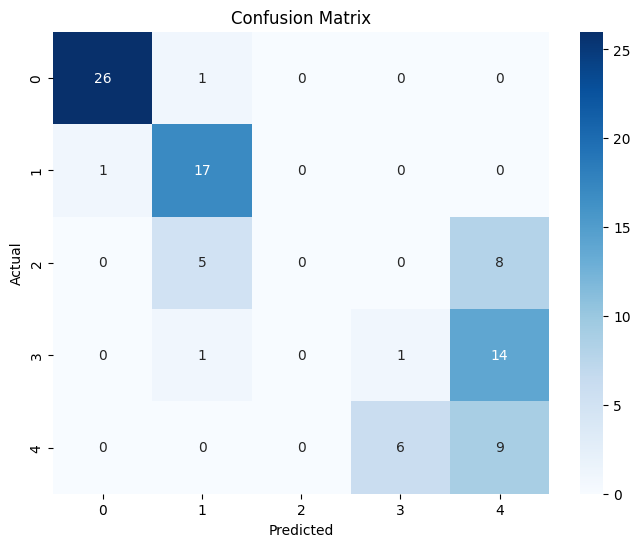

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Calculos de hiperparametros

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline  import Pipeline
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter= 1000, random_state=42))
])

In [ ]:
mlp = MLPClassifier(max_iter=500, random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

In [ ]:
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)


{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
0.9716065478777343


Aplicamos ensamble  con Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## 1. Cargar los datos (reemplaza con tu archivo o DataFrame)
data = pd.read_csv("/content/drive/MyDrive/bootcamp1/Oscars-demographics-DFE.csv", encoding = 'ISO-8859-1')  # Asegúrate de cambiar el nombre

## 2. Separar variables predictoras y objetivo
X = data.drop("award", axis=1)
y = data["award"]

## 3. Detectar tipos de columnas
cat_cols = X.select_dtypes(include=["object", "category"]).columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

## 4. Preprocesamiento con ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ]), num_cols),

    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])

## 5. Crear pipeline con modelo de ensamble
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=100,      # número de árboles
        random_state=42,
        class_weight="balanced"  # útil si las clases están desbalanceadas
    ))
])

## 6. Separar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Entrenar el modelo
pipeline.fit(X_train, y_train)

## 8. Hacer predicciones y evaluar
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8764044943820225
[[17  0  0  1  0]
 [ 0 14  0  0  2]
 [ 2  0 23  0  2]
 [ 1  0  0 10  2]
 [ 0  1  0  0 14]]
                         precision    recall  f1-score   support

             Best Actor       0.85      0.94      0.89        18
           Best Actress       0.93      0.88      0.90        16
          Best Director       1.00      0.85      0.92        27
  Best Supporting Actor       0.91      0.77      0.83        13
Best Supporting Actress       0.70      0.93      0.80        15

               accuracy                           0.88        89
              macro avg       0.88      0.87      0.87        89
           weighted avg       0.89      0.88      0.88        89



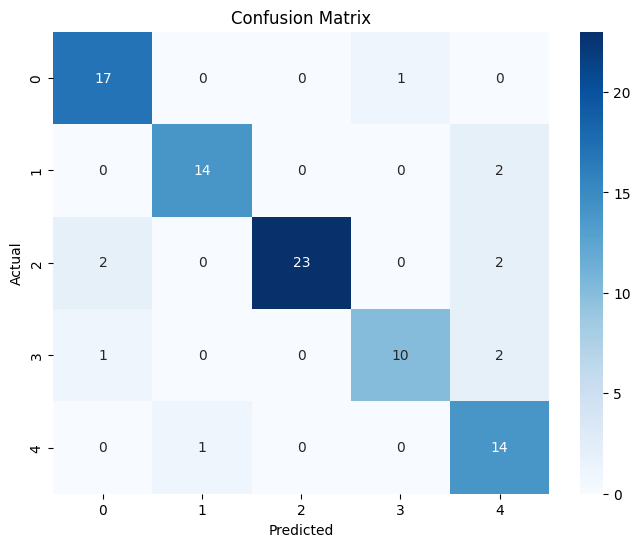

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

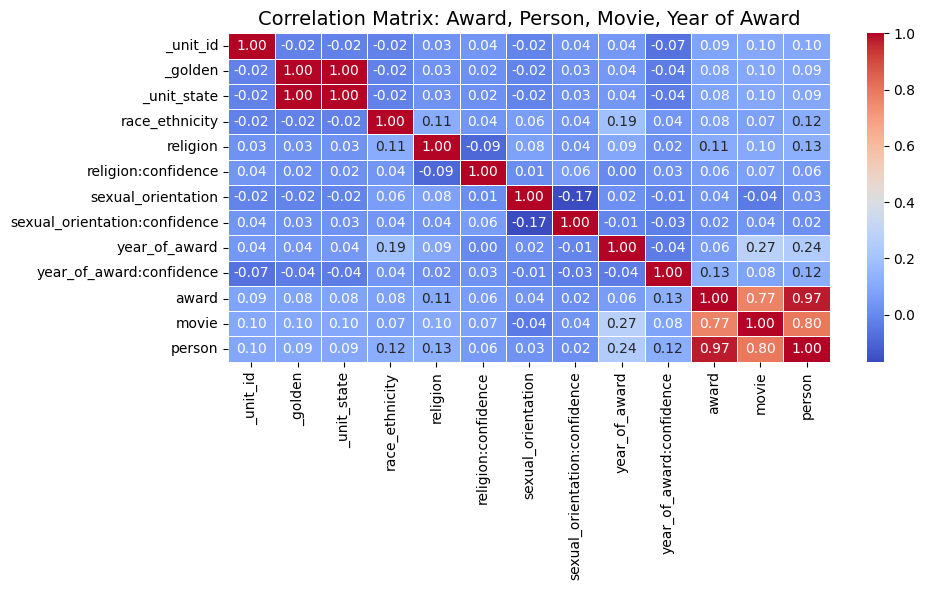

In [ ]:
corr_matrix = df.corr()

# Graficamos la matriz de correlación como un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: Award, Person, Movie, Year of Award', fontsize=14)
plt.tight_layout()
plt.show()

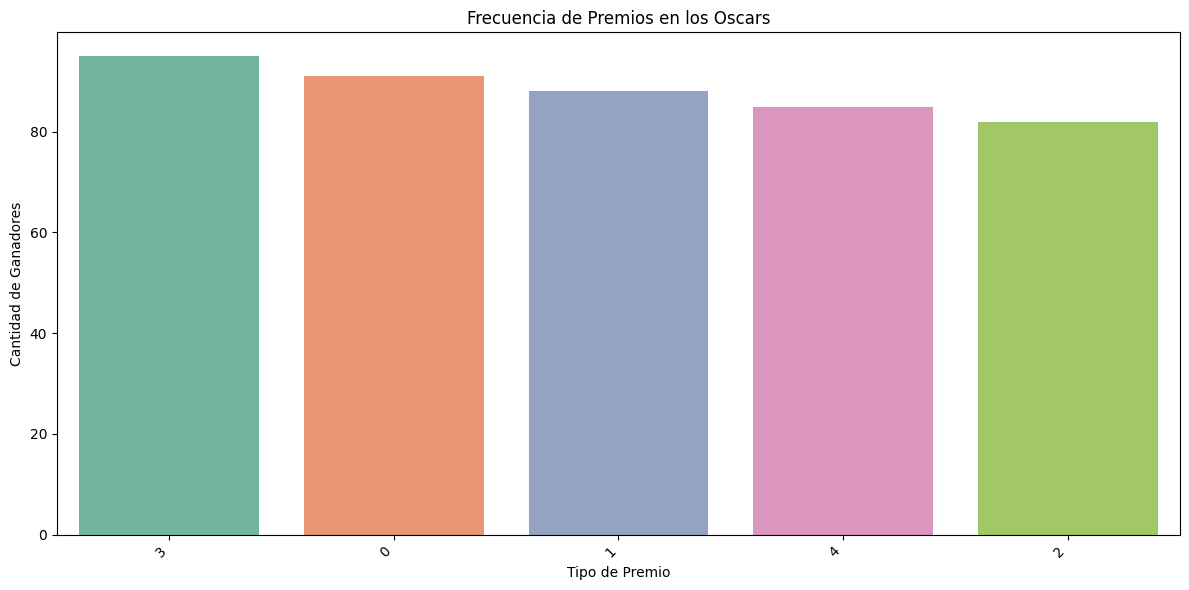

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='award', order=df['award'].value_counts().index, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title("Frecuencia de Premios en los Oscars")
plt.xlabel("Tipo de Premio")
plt.ylabel("Cantidad de Ganadores")
plt.tight_layout()
plt.show()

<Axes: xlabel='award', ylabel='count'>

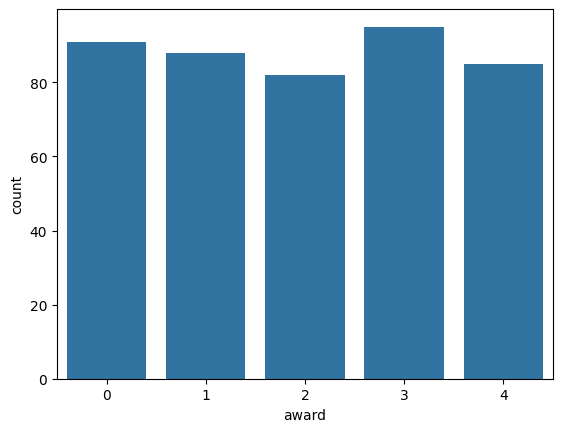

In [ ]:
top_awards = df['award'].value_counts().nlargest(5).index
sns.countplot(data=df[df['award'].isin(top_awards)], x='award')
